### Question 1

In [183]:
import pymysql as psql 
from tkinter import *
from tkinter import ttk

class Dbconnect(object):
    def __init__(self):
        self.dbconection = psql.connect(host='localhost',
        port=3306, user='root',
        passwd='root', db='gestionpersonnes')
        self.dbcursor = self.dbconection.cursor()
    def commit_db(self):
        self.dbconection.commit()
    def close_db(self):
        self.dbcursor.close() ; self.dbconection.close()

### Question 2

## 1er interface

In [102]:
class Interface(Frame):
    try:
        db=Dbconnect()
        db.dbcursor.execute("SELECT * FROM employés")
        results = db.dbcursor.fetchall()
        db.commit_db()
        db.close_db()
        i=0
    except MySQLError as err:
        print(err)

    def __init__(self,fenetre,**kwargs):
        Frame.__init__(self,fenetre)
        self.pack(fill=BOTH)

        # the notebook
        tabs = ttk.Notebook(self) 
        #the first tab 
        tab1 = ttk.Frame(tabs) 
        #the second tab
        tab2 = ttk.Frame(tabs) 
        tabs.add(tab1, text ='info société') 
        tabs.add(tab2, text ='info personnelles') 
        tabs.grid(row=0,column=0)

        
        self.Num=Label(tab1, text = "N° employe").grid(row=0,column=0)
        self.champNum=Entry(tab1)
        self.champNum.grid(row=0,column=1)

        
        self.Nom=Label(tab1, text = "Nom").grid(row=1,column=0)
        self.champNom=Entry(tab1)
        self.champNom.grid(row=1,column=1)

        
        self.Prenom=Label(tab1, text = "Prénom").grid(row=2,column=0)
        self.champPrenom=Entry(tab1)
        self.champPrenom.grid(row=2,column=1)

    
        self.Fonction=Label(tab1, text = "Fonction").grid(row=3,column=0)
        self.champFonction=Entry(tab1)
        self.champFonction.grid(row=3,column=1)
        

        self.Adresse=Label(tab2, text = "Adresse" ).grid(row=0,column=0)
        self.champAdresse=Entry(tab2)
        self.champAdresse.grid(row=0,column=1)
        

        self.Tel=Label(tab2, text = "tel domicile").grid(row=1,column=0)
        self.champTel=Entry(tab2)
        self.champTel.grid(row=1,column=1)

        btnFrm= Frame(self)
        btnFrm.grid(row=4,column=0)

        self.btn1=Button(btnFrm, text = "<",command=self.Back)
        self.btn1.grid(row=1,column=0)
        self.btn2=Button(btnFrm, text = ">",command=self.Next)
        self.btn2.grid(row=1,column=3)

        self.btn4=Button(btnFrm, text = "Quitter",command=self.destroy)
        self.btn4.grid(row=1,column=6)
       #insertion du 1er employé 
        self.j=0
        champs=[self.champNum,self.champNom,self.champPrenom,self.champFonction,self.champAdresse,self.champTel]
        for value in self.results[self.i]:
            champs[self.j].insert(0,value)
            self.j+=1

    def Next(self):
            if((self.i)<len(self.results)-1):
                k=0
                self.i+=1
                champs=[self.champNum,self.champNom,self.champPrenom,self.champFonction,self.champAdresse,self.champTel]
                for value in self.results[self.i]:
                    champs[k].delete(0,'end')
                    champs[k].insert(0,value)
                    k+=1
           

    def Back(self):
            if(self.i>0):
                self.i-=1
                k=0
                champs=[self.champNum,self.champNom,self.champPrenom,self.champFonction,self.champAdresse,self.champTel]
                for value in self.results[self.i]:
                    champs[k].delete(0,'end')
                    champs[k].insert(0,value)
                    k+=1
            
f=Tk()
f.title('Consultation des employés')
interface=Interface(f)
interface.mainloop()

## 2eme interface

In [187]:
class Interface(Frame):
    try:
        db=Dbconnect()
        db.dbcursor.execute('SELECT c.Ncommande,c.DateCommande,c.AlivrerAvant,c.DateEnvoi,cls.codeClient,cls.société FROM commandes c,clients cls where c.CodeClient=cls.codeClient')
        results1= db.dbcursor.fetchall()
        db.dbcursor.execute('SELECT c.Ncommande,p.RéfProduit,nomProduit,quantité FROM commandes c,détailscommandes d ,produits p  where c.Ncommande=d.Ncommande and d.RéfProduit=p.RéfProduit')
        results2= db.dbcursor.fetchall()
        db.commit_db()
        db.close_db()
    except MySQLError as err:
        print(err)

    def __init__(self,fenetre,**kwargs):
        Frame.__init__(self,fenetre)
        self.pack(fill=BOTH)
    
        l = LabelFrame(self, text="infos Commande")
        l.pack(fill="both", expand="yes" , padx=8 , pady=8)
        
        self.listNcommandes = []
        for r in self.results1:
            self.listNcommandes.append(r[0])
        
        self.Ncommande=StringVar()
        self.comboText=Label(l, text = "Ncommande").grid(row=0,column=0)
        self.combo = ttk.Combobox(l, values=self.listNcommandes )
        self.combo.grid(row=0, column=1)
        self.combo.current(0)
        
        self.dateC=Label(l, text = "DateCommande").grid(row=1,column=0)
        self.champDateC=Entry(l)
        self.champDateC.grid(row=1,column=1)

        
        self.LivrerAvant=Label(l, text = "AlivrerAvant").grid(row=2,column=0)
        self.champLivrerAvant=Entry(l)
        self.champLivrerAvant.grid(row=2,column=1)

    
        self.DateEnvoi=Label(l, text = "DateEnvoi").grid(row=3,column=0)
        self.champDateEnvoi=Entry(l)
        self.champDateEnvoi.grid(row=3,column=1)
        

        self.codC=Label(l, text = "CodeClient" ).grid(row=4,column=0)
        self.champCodc=Entry(l)
        self.champCodc.grid(row=4,column=1)
        

        self.Societe=Label(l, text = "Societe").grid(row=5,column=0)
        self.champSoc=Entry(l)
        self.champSoc.grid(row=5,column=1)
        
        l2 = LabelFrame(self, text="details Commande")
        l2.pack(fill="both", expand="yes", padx=10,pady=10 )
    
        
        
        
        # treeView & fill in the data
        self.tree = ttk.Treeview(l2,columns= (1,2,3),height=5,show="headings")
        self.tree.place(x=50, y=50, width=300)
        self.tree.column(1, width=50)
        self.tree.column(2, width=150)
        self.tree.column(3, width=50) ;
        self.tree.heading(1,text="RefProduit");
        self.tree.heading(2, text="Nom produit")
        self.tree.heading(3, text="Qt com");
        sbar = ttk.Scrollbar(l2,orient='vertical',command=self.tree.yview)
        sbar.pack(side=RIGHT, fill=Y)
        self.tree.pack(side=LEFT, expand=YES, fill=BOTH)
        self.tree.configure(yscroll=sbar.set)
        self.combo.bind("<<ComboboxSelected>>" , self.comboAction )
        
        Ncmd=int(self.combo.get())
        for row in self.results1:
            if(row[0]==Ncmd):
                champs=[self.champDateC,self.champLivrerAvant,self.champDateEnvoi,self.champCodc,self.champSoc]
                for i in range(0,5):
                    champs[i].delete(0,'end')
                    champs[i].insert(0,row[i+1])
                for row in self.results2:
                     if(row[0]==Ncmd):
                        self.tree.insert('','end', values=(row[1], row[2], row[3]))
        

    def comboAction(self,event):
                for i in self.tree.get_children():
                    self.tree.delete(i)
                Ncmd=int(self.combo.get())
                for row in self.results1:
                    if(row[0]==Ncmd):
                        champs=[self.champDateC,self.champLivrerAvant,self.champDateEnvoi,self.champCodc,self.champSoc]
                        for i in range(0,5):
                            champs[i].delete(0,'end')
                            champs[i].insert(0,row[i+1])
                        for row in self.results2:
                             if(row[0]==Ncmd):
                                self.tree.insert('','end', values=(row[1], row[2], row[3]))

f=Tk()
f.title('Consultation des employés')
interface=Interface(f)
interface.mainloop()

## 3eme interface


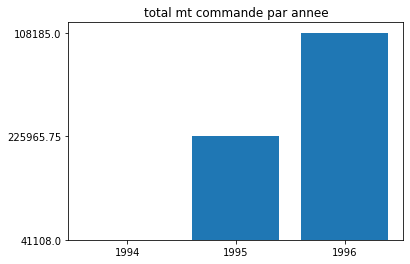

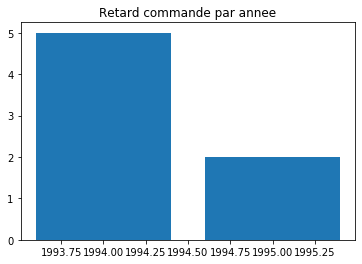

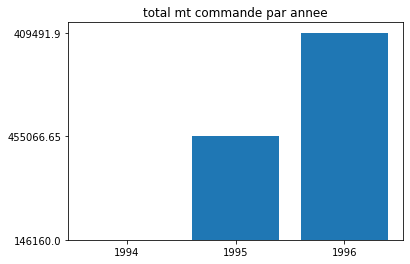

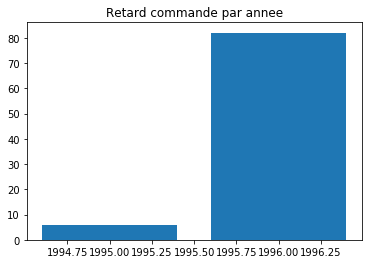

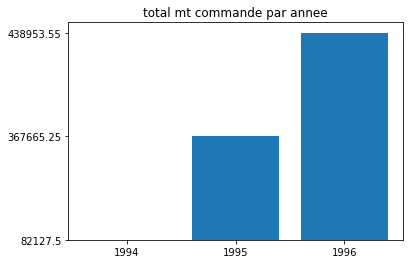

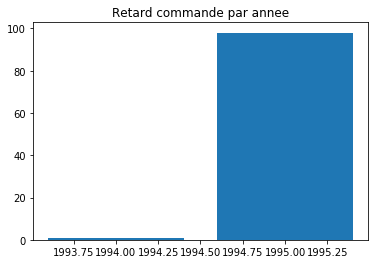

In [203]:
from pylab import *
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import numpy as np
class Interface(Frame):

    try:
        db=Dbconnect()
        db.dbcursor.execute("SELECT nom FROM employés")
        results1 = db.dbcursor.fetchall()
        db.dbcursor.execute("""SELECT employes.Nom, Year(commandes.DateCommande) as AnCom,
        sum( PrixUnitaire*Quantité *(1-'Remise (%)') ) as mt FROM (gestionpersonnes.commandes commandes
        INNER JOIN gestionpersonnes.détailscommandes detailscommandes
           ON (commandes.NCommande = detailscommandes.NCommande))
       INNER JOIN gestionpersonnes.employés employes
          ON (employes.NEmployé = commandes.NEmployé)
  group by Nom,Year(commandes.DateCommande)""")
        results2 = db.dbcursor.fetchall()
        db.dbcursor.execute(""" SELECT employes.Nom, year(commandes.DateCommande),
sum( commandes.DateEnvoi - commandes.ALivrerAvant ) 
as totalRetar FROM gestionpersonnes.employés employes 
INNER JOIN gestionpersonnes.commandes commandes ON (employes.NEmployé = commandes.NEmployé) 
where (commandes.DateEnvoi-commandes.ALivrerAvant)> 0 
group by employes.Nom, year(commandes.DateCommande) """)
        results3 = db.dbcursor.fetchall()
        db.commit_db()
        db.close_db()
    except MySQLError as err:
        print(err)
    

    def __init__(self,fenetre,**kwargs):
        Frame.__init__(self,fenetre, width=500, height=500, ** kwargs)
        self.pack(fill=BOTH)
        
        self.emp=Label(self, text = ("Employés")).grid(row=0,column=0)
        listNoms = []
        for value in self.results1:
            listNoms.append(value[0])
        self.combo = ttk.Combobox( self , values = listNoms)
        self.combo.grid(row=0,column=3)
        self.combo.bind("<<ComboboxSelected>>",self.comboAction)

    
    def comboAction(self,event):
        res=self.results2
        nom=self.combo.get()
        listTotal = []
        for row in res:
            if(row[0]==nom):
                listTotal.append(row)
        res=np.array(listTotal)
        
        annee=res.transpose()[1]
        somme=res.transpose()[2]
        fig = plt.figure()
        plt.bar(annee,somme)
        plt.title("total mt commande par annee")
        canvas = FigureCanvasTkAgg(fig,master=self)
        canvas.draw()
        canvas.get_tk_widget().grid(row=4, column=2)

        res3=self.results3
        listRetards = []
        for row in res3:
            if(row[0]==nom):
                listRetards.append(row)
        res3=np.array(listRetards)
        annee=res3.transpose()[1]
        retard=res3.transpose()[2]
        fig = plt.figure()
        plt.bar(annee, retard)
        plt.title("Retard commande par annee")
        canvas = FigureCanvasTkAgg(fig,master=self)
        canvas.draw()
        canvas.get_tk_widget().grid(row=4, column=4)
f=Tk()
f.title('Consultation des employés')
interface=Interface(f)
interface.mainloop()
